In [451]:
#imports
import os
from six.moves import urllib
import pandas as pd
import numpy as np 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [452]:
DOWNLOAD_ROOT = "http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening"
CREDIT_DATA_URL = DOWNLOAD_ROOT + "/crx.data"
CREDIT_DATA_PATH = "datasets/credit-screening"

In [453]:
# fetch data from its origin
def fetch_credit_crad_data(credit_data_url=CREDIT_DATA_URL, credit_path=CREDIT_DATA_PATH):
    if not os.path.isdir(credit_path):
        os.makedirs(credit_path)
    credit_data_path = os.path.join(credit_path, "crx.data")
    urllib.request.urlretrieve(credit_data_url, credit_data_path)

fetch_credit_crad_data()

In [454]:
def load_credit_card_data(credit_data_path=CREDIT_DATA_PATH):
    csv_path=os.path.join(credit_data_path, "crx.data")
    pd.set_option('display.max_columns', None)
    col_names = ["Gender","Age","Debt","Married","BankCustomer","EducationLevel","Ethnicity","YearsEmployed","PriorDefault","Employed","CreditScore", "DriversLicense", "Citizen", "ZipCode", "Income" , "ApprovalStatus"]
    return pd.read_csv(csv_path, header=None, names=col_names)

dataset = load_credit_card_data()
dataframe = dataset.copy()
dataset.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [455]:
#replace missing numeric values with mean
dataset = dataset.replace("?", np.nan).replace('+', 1).replace('-', 0)
dataset.fillna(dataset.mean(), inplace=True)
#replace missing object values with the most freequent value
for col in dataset:
    if dataset[col].dtypes == 'object':
        dataset = dataset.fillna(dataset[col].value_counts().index[0])

dataset.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [456]:
dataset['ApprovalStatus'].value_counts()

0    383
1    307
Name: ApprovalStatus, dtype: int64

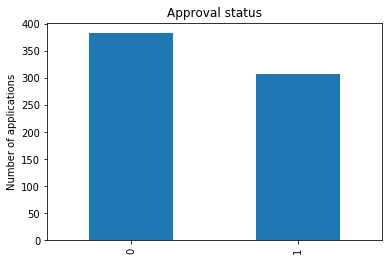

In [457]:
CountStatus = pd.value_counts(dataset['ApprovalStatus'].values, sort=False)
plt.ylabel('Number of applications')
plt.title('Approval status')
CountStatus.plot.bar()

In [458]:
dataset.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus      int64
dtype: object

In [459]:
#le = preprocessing.LabelEncoder()

#for col in dataset:
    #if dataset[col].dtypes == 'object':
        #dataset[col]=le.fit_transform(dataset[col])

dataset.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
Employed           object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus      int64
dtype: object

In [460]:
# using OneHotEncoder
# https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621
#https://towardsdatascience.com/encoding-categorical-features-21a2651a065c

#categorical_features = dataset[['Gender', 'Age', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ZipCode']]

#onehotencoder = OneHotEncoder(categorical_features = [0])
#categorical_features = onehotencoder.fit_transform(dataset).toarray()

#enc = OneHotEncoder(handle_unknown='ignore')
#enc.fit(dataset)
#enc.categories_
#enc.transform(dataset).toarray()

categorical_features = ['Gender', 'Age', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'ZipCode']


ct = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=False), [0, 1, 3, 4, 5, 6, 8, 9, 11, 12, 13]),],  # the column numbers I want to apply this to
    remainder='passthrough'  # This leaves the rest of my columns in place
)
#print(ct.fit_transform(dataset)) # Notice the output is a string
#ct.fit_transform(dataset)
dataset = np.array(ct.fit_transform(dataset), dtype=np.float)

df = pd.DataFrame(data=dataset[1:,1:])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x143a46a20>,
      dtype=object)

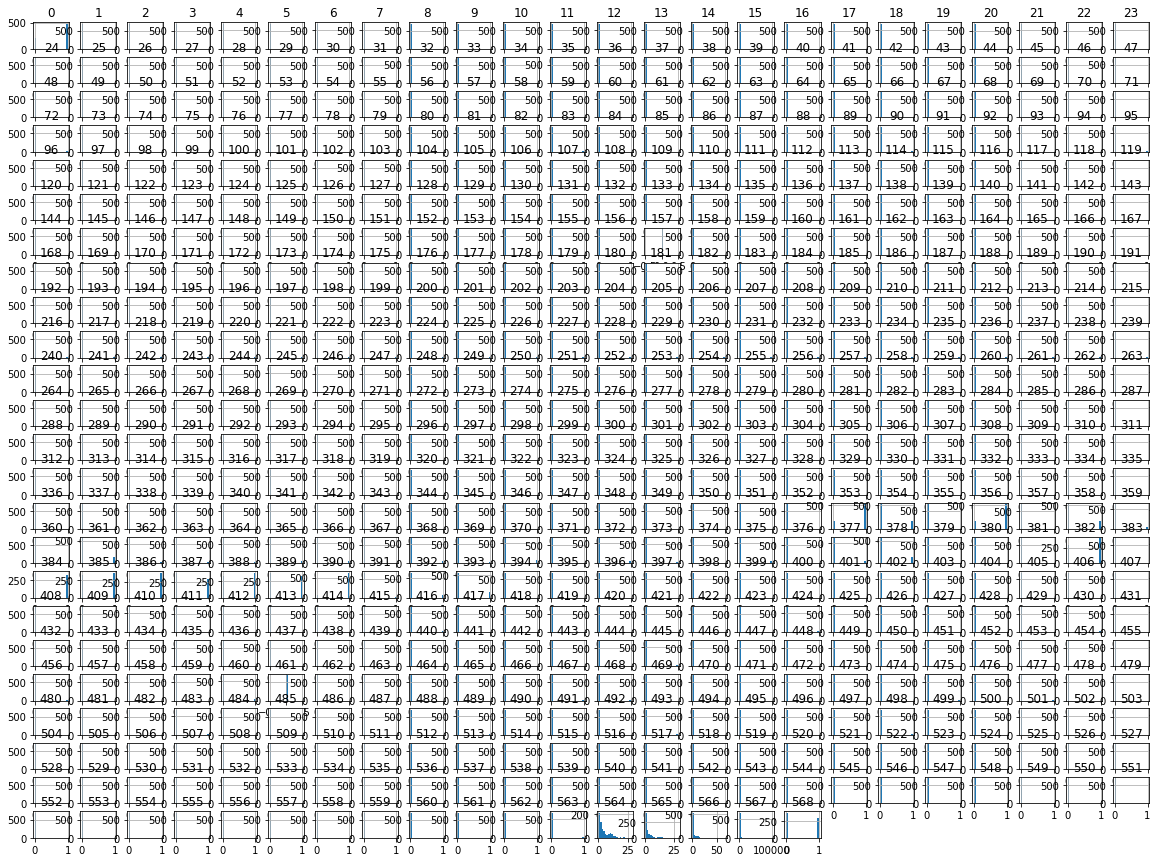

In [461]:
df.hist(bins=20, figsize=(20, 15))

In [462]:
def make_corr_heatmap(data):
    corr = data.corr()
    sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)

make_corr_heatmap(dataset)

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [ ]:
dataset.corr()['ApprovalStatus'].sort_values()

In [ ]:
#use MAD to check the spread of the observation from the mean. MAD > std because we have outliers like age, income
dataset.mad()

In [ ]:
#drop columns with the lowest correlation, or columns that do not make sense
dataset = dataset.drop(['DriversLicense', 'ZipCode', 'Ethnicity', 'Gender'], axis=1)
dataset.head()

In [ ]:
#separate the features and labels
dataset = dataset.values
X,y = dataset[:,0:11] , dataset[:,11]

#split the dataset into train, validation and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [ ]:
#rescale the training and testing sets
